In [1]:
#----------------------------------------------------------------------------------------
#-----------------Section A: Data Preprocessing------------------------------------------
#----------------------------------------------------------------------------------------

In [2]:
# Step 1: Import relevant libraries---------------------------------------------------------
import json
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Standard libraries for data analysis:----------------------
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

In [4]:
# sklearn modules for data preprocessing-------------------------------------
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler 

In [5]:
#Standard libraries for data visualization---------------------
from IPython.display import display
pd.options.display.max_columns = None

import matplotlib
from matplotlib import pyplot
import matplotlib.pylab as pylab
import matplotlib.ticker as mtick
%matplotlib inline

from pandas.plotting import scatter_matrix
import seaborn as sn
color = sn.color_palette()

In [6]:
#sklearn modules for Model Selection--------------------------------------
from sklearn import discriminant_analysis, ensemble, gaussian_process,  naive_bayes
from sklearn import linear_model, neighbors, svm, tree

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#import sys
#!{sys.executable} -m pip install xgboost
from xgboost import XGBClassifier

In [7]:
#sklearn modules for Model Evaluation & Improvement---------------------------
from sklearn import feature_selection
from sklearn import metrics
from sklearn import model_selection

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from sklearn.metrics import make_scorer, recall_score, log_loss

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [8]:
#Miscellaneous Utilitiy Libraries--------------------------------------
from datetime import datetime
from dateutil.parser import parse
import joblib
import os
import random
import re
import string
import sys
import time
from time import time
import timeit

In [9]:
#Step 2: Set up current working directory------------------------------------------
os.chdir(r"C:\Users\Yugibird\OneDrive")

In [10]:
pwd

'C:\\Users\\Yugibird\\OneDrive'

In [11]:
# Step 3: Import the dataset telecom dataset into a pandas data frame---------------------------------------------
df_telco = pd.read_csv('telco_churn_mf.csv')
df = df_telco
dt = pd.read_csv('telco_churn_cr.csv')
# visualize column names
df_telco.columns

Index(['Gender', 'Age', 'Married', 'Number of Dependents', 'Churn', 'CLTV',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue'],
      dtype='object')

In [12]:
# Step 4: Evaluate Datastructure --------------------------------------------------------
df_telco.head()

,Gender,Age,Married,Number of Dependents,Churn,CLTV,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,Female,37,Yes,0,No,2205,2,9,None,Yes,42.39,No,Yes,Cable,16,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81
1,Male,46,No,0,No,5414,0,9,None,Yes,10.69,Yes,Yes,Cable,10,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,59.9,542.40,38.33,10,96.21,610.28
2,Male,50,No,0,Yes,4479,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45
3,Male,78,Yes,0,Yes,3714,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51
4,Female,75,Yes,0,Yes,3464,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54


In [13]:
# check unique values of each column
for column in df_telco.columns:
    print('Column: {} - Unique Values: {}'.format(column, df_telco[column].unique()))

Column: Gender - Unique Values: ['Female' 'Male']
Column: Age - Unique Values: [37 46 50 78 75 23 67 52 68 43 47 25 58 32 39 72 79 26 30 22 34 42 64 48
 28 33 31 60 69 20 57 19 38 54 35 51 66 61 24 55 59 71 49 40 21 45 29 62
 76 77 73 41 56 80 63 53 44 70 74 36 27 65]
Column: Married - Unique Values: ['Yes' 'No']
Column: Number of Dependents - Unique Values: [0 3 1 2 4 6 5 9 7 8]
Column: Churn - Unique Values: ['No' 'Yes']
Column: CLTV - Unique Values: [2205 5414 4479 ... 3245 5773 5639]
Column: Number of Referrals - Unique Values: [ 2  0  1  3  8  9 10  5  4  7  6 11]
Column: Tenure in Months - Unique Values: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]
Column: Offer - Unique Values: ['None' 'Offer E' 'Offer D' 'Offer A' 'Offer B' 'Offer C']
Column: Phone Service - Unique Values: ['Yes' 'No']
Column: Avg Monthly 

In [14]:
# Statistics for the columns (features). Set it to all, since default is to describe just the numeric features.
df_telco.describe(include = 'all')

,Gender,Age,Married,Number of Dependents,Churn,CLTV,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043,7043.000000,7043,7043.000000,7043,7043.000000,7043.000000,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
unique,2,NaN,2,NaN,2,NaN,NaN,NaN,6,2,NaN,2,2,4,NaN,2,2,2,2,2,2,2,2,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,Male,NaN,No,NaN,No,NaN,NaN,NaN,None,Yes,NaN,No,Yes,Fiber Optic,NaN,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,NaN,NaN,NaN,NaN,NaN,NaN
freq,3555,NaN,3641,NaN,5174,NaN,NaN,NaN,3877,6361,NaN,4072,5517,3035,NaN,5024,4614,4621,4999,4336,4311,4555,4745,3610,4171,3909,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,46.509726,NaN,0.468692,NaN,4400.295755,1.951867,32.386767,NaN,NaN,22.958954,NaN,NaN,NaN,20.515405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,NaN,16.750352,NaN,0.962802,NaN,1183.057152,3.001199,24.542061,NaN,NaN,15.448113,NaN,NaN,NaN,20.418940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,NaN,19.000000,NaN,0.000000,NaN,2003.000000,0.000000,1.000000,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,NaN,32.000000,NaN,0.000000,NaN,3469.000000,0.000000,9.000000,NaN,NaN,9.210000,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,NaN,46.000000,NaN,0.000000,NaN,4527.000000,0.000000,29.000000,NaN,NaN,22.890000,NaN,NaN,NaN,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,NaN,60.000000,NaN,0.000000,NaN,5380.500000,3.000000,55.000000,NaN,NaN,36.395000,NaN,NaN,NaN,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000


In [15]:
#Recheck Column Datatypes and Missing Values:
    
df_telco.columns.to_series().groupby(df_telco.dtypes).groups

{int64: ['Age', 'Number of Dependents', 'CLTV', 'Number of Referrals', 'Tenure in Months', 'Avg Monthly GB Download', 'Total Extra Data Charges'], float64: ['Avg Monthly Long Distance Charges', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Long Distance Charges', 'Total Revenue'], object: ['Gender', 'Married', 'Churn', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method']}

In [16]:
df_telco['Tenure in Months'].describe()

count    7043.000000
mean       32.386767
std        24.542061
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: Tenure in Months, dtype: float64

In [17]:
# null observations of the Total Charges column
df_telco[df_telco['Total Charges'].isnull()]

,Gender,Age,Married,Number of Dependents,Churn,CLTV,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue


In [18]:
df_telco.isnull().sum() 

Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
Churn                                0
CLTV                                 0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method           

In [19]:
df_telco.loc[df_telco['Tenure in Months'] == 0]

,Gender,Age,Married,Number of Dependents,Churn,CLTV,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue


In [20]:
#Step 5: Check Target Variable Distribution ----------------------------------------------- 

df_telco["Churn"].value_counts()


# ======================================================================================================
#In this case, we have class imbalance with few negatives. In our business challenge, 
#false negatives are costly. Hence let's keep an eye onto the Precision, Recall & F2 score besides accuracy
# ======================================================================================================


No     5174
Yes    1869
Name: Churn, dtype: int64

Churn
No     5174
Yes    1869
dtype: int64


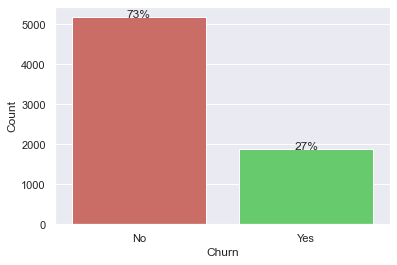

In [21]:
sn.set(style="darkgrid")
sn.set_palette("hls", 3)
print(df_telco.groupby(['Churn']).size())
churn_plot = sn.countplot(data=df_telco, x='Churn', order=df_telco.Churn.value_counts().index)
plt.ylabel('Count')
for p in churn_plot.patches:
    height = p.get_height()
    churn_plot.text(p.get_x()+p.get_width()/2., height + 1,'{0:.0%}'.format(height/float(len(df_telco))),ha="center") 
plt.show()

In [22]:
df_telco.loc[df_telco['Churn'] == 'No']

,Gender,Age,Married,Number of Dependents,Churn,CLTV,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,Female,37,Yes,0,No,2205,2,9,None,Yes,42.39,No,Yes,Cable,16,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.60,593.30,0.00,0,381.51,974.81
1,Male,46,No,0,No,5414,0,9,None,Yes,10.69,Yes,Yes,Cable,10,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,59.90,542.40,38.33,10,96.21,610.28
5,Female,23,No,3,No,5108,0,9,Offer E,Yes,16.77,No,Yes,Cable,73,No,No,No,Yes,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Credit Card,69.40,571.45,0.00,0,150.93,722.38
6,Female,67,Yes,0,No,5011,1,71,Offer A,Yes,9.96,No,Yes,Fiber Optic,14,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two Year,Yes,Bank Withdrawal,109.70,7904.25,0.00,0,707.16,8611.41
7,Male,52,Yes,0,No,4604,8,63,Offer B,Yes,12.96,Yes,Yes,Fiber Optic,7,Yes,No,No,Yes,No,No,No,No,Two Year,Yes,Credit Card,84.65,5377.80,0.00,20,816.48,6214.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7035,Female,20,No,0,No,5545,0,7,Offer E,Yes,36.49,No,Yes,Fiber Optic,42,No,Yes,No,No,Yes,Yes,Yes,Yes,One Year,Yes,Credit Card,94.05,633.45,0.00,0,255.43,888.88
7038,Female,20,No,0,No,3161,0,13,Offer D,Yes,46.68,No,Yes,DSL,59,Yes,No,No,Yes,No,No,Yes,Yes,One Year,No,Credit Card,55.15,742.90,0.00,0,606.84,1349.74
7040,Male,22,No,0,No,5870,0,2,Offer E,Yes,18.62,No,Yes,DSL,51,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,50.30,92.75,0.00,0,37.24,129.99
7041,Male,21,Yes,0,No,4792,5,67,Offer A,Yes,2.12,No,Yes,Cable,58,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Two Year,No,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69


In [23]:
#Step 6: Clean the Dataset----------------------------------------------------------------------
df_telco['Total Charges'].describe()
#Previously

count    7043.000000
mean     2280.381264
std      2266.220462
min        18.800000
25%       400.150000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: Total Charges, dtype: float64

In [24]:
#Optional Cleaning if datatype is different than real life abstraction
df_telco['Total Charges'] = pd.to_numeric(df_telco['Total Charges'],errors='coerce')
df_telco['Total Charges'] = df_telco['Total Charges'].astype("float")

In [25]:
df_telco['Total Charges'].describe()
#Afterwards: No Changes

count    7043.000000
mean     2280.381264
std      2266.220462
min        18.800000
25%       400.150000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: Total Charges, dtype: float64

In [26]:
#Step 7: Take care of missing data---------------------------------------------------------------
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   object 
 3   Number of Dependents               7043 non-null   int64  
 4   Churn                              7043 non-null   object 
 5   CLTV                               7043 non-null   int64  
 6   Number of Referrals                7043 non-null   int64  
 7   Tenure in Months                   7043 non-null   int64  
 8   Offer                              7043 non-null   object 
 9   Phone Service                      7043 non-null   object 
 10  Avg Monthly Long Distance Charges  7043 non-null   float64
 11  Multiple Lines                     7043 non-null   objec

In [27]:
df_telco.isnull().any()

Gender                               False
Age                                  False
Married                              False
Number of Dependents                 False
Churn                                False
CLTV                                 False
Number of Referrals                  False
Tenure in Months                     False
Offer                                False
Phone Service                        False
Avg Monthly Long Distance Charges    False
Multiple Lines                       False
Internet Service                     False
Internet Type                        False
Avg Monthly GB Download              False
Online Security                      False
Online Backup                        False
Device Protection Plan               False
Premium Tech Support                 False
Streaming TV                         False
Streaming Movies                     False
Streaming Music                      False
Unlimited Data                       False
Contract   

In [28]:
#Find the average and fill missing values of each columns programmatically.

na_cols = df_telco.isnull().any()

na_cols = na_cols[na_cols == True].reset_index()

na_cols = na_cols["index"].tolist()

for col in df_telco.columns[1:]:
     if col in na_cols:
        if df_telco[col].dtype != 'object':
             df_telco[col] =  df_telco[col].fillna(df_telco[col].mean()).round(0)

In [29]:
#----------------------------------------------------------------------------------------
#-----------------Section B: Data Evaluation------------------------------------------
#----------------------------------------------------------------------------------------

In [30]:
#Step 8: Exploratory Data Analysis----------------------------------------------------------------------

In [31]:
#Step 8.1. Analyze distribution of Key Categorical Variables--------------------------------------------- 
columns_idx = np.s_[0:] # Slice of first row(header) with all columns.
first_record_idx = np.s_[0] # Index of first record

string_fields = [type(fld) is str for fld in df_telco.iloc[first_record_idx, columns_idx]] # All string fields
all_features = [x for x in df_telco.columns if x != 'Churn']
categorical_columns = list(np.array(df_telco.columns)[columns_idx][string_fields])
categorical_features = [x for x in categorical_columns if x != 'Churn']
continuous_features = [x for x in all_features if x not in categorical_features]

#print('All Features: ', all_features)
#print('\nCategorical Features: ', categorical_features)
#print('\nContinuous Features: ', continuous_features)
#print('\nAll Categorical Columns: ', categorical_columns)

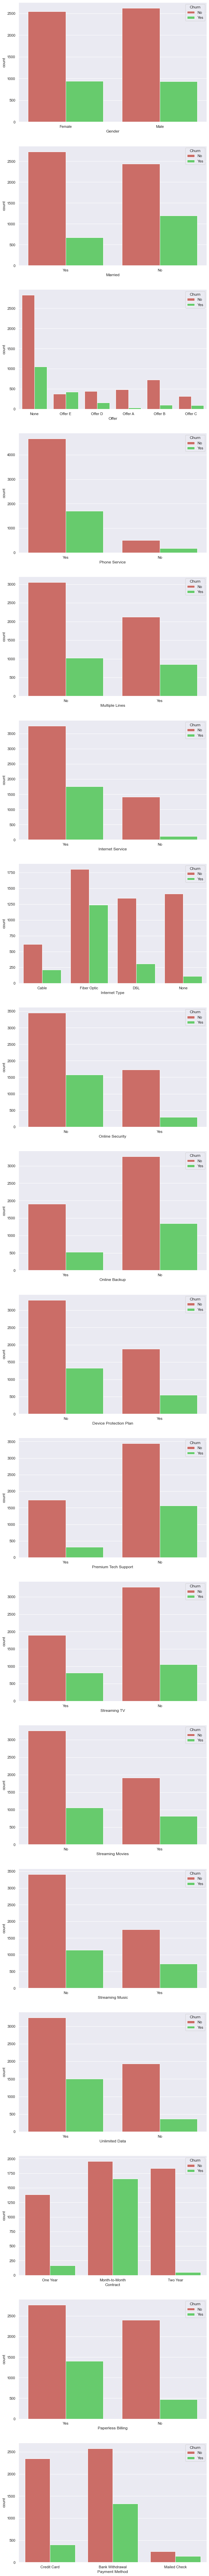

In [32]:
# Categorical feature count plots
f, ((ax1), (ax2), (ax3), (ax4), (ax5), (ax6), (ax7), (ax8), (ax9), (ax10), (ax11), (ax12), (ax13), (ax14), (ax15), (ax16), (ax17), (ax18)) = plt.subplots(18, 1, figsize=(10, 140))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16, ax17, ax18]

for i in range(len(categorical_features)):
    sn.countplot(x = categorical_features[i], hue="Churn", data=df_telco, ax=ax[i])

array([<AxesSubplot:title={'center':'Age'}>,
       <AxesSubplot:title={'center':'Number of Dependents'}>,
       <AxesSubplot:title={'center':'CLTV'}>,
       <AxesSubplot:title={'center':'Number of Referrals'}>,
       <AxesSubplot:title={'center':'Tenure in Months'}>,
       <AxesSubplot:title={'center':'Avg Monthly Long Distance Charges'}>,
       <AxesSubplot:title={'center':'Avg Monthly GB Download'}>,
       <AxesSubplot:title={'center':'Monthly Charge'}>,
       <AxesSubplot:title={'center':'Total Charges'}>,
       <AxesSubplot:title={'center':'Total Refunds'}>,
       <AxesSubplot:title={'center':'Total Extra Data Charges'}>,
       <AxesSubplot:title={'center':'Total Long Distance Charges'}>,
       <AxesSubplot:title={'center':'Total Revenue'}>], dtype=object)

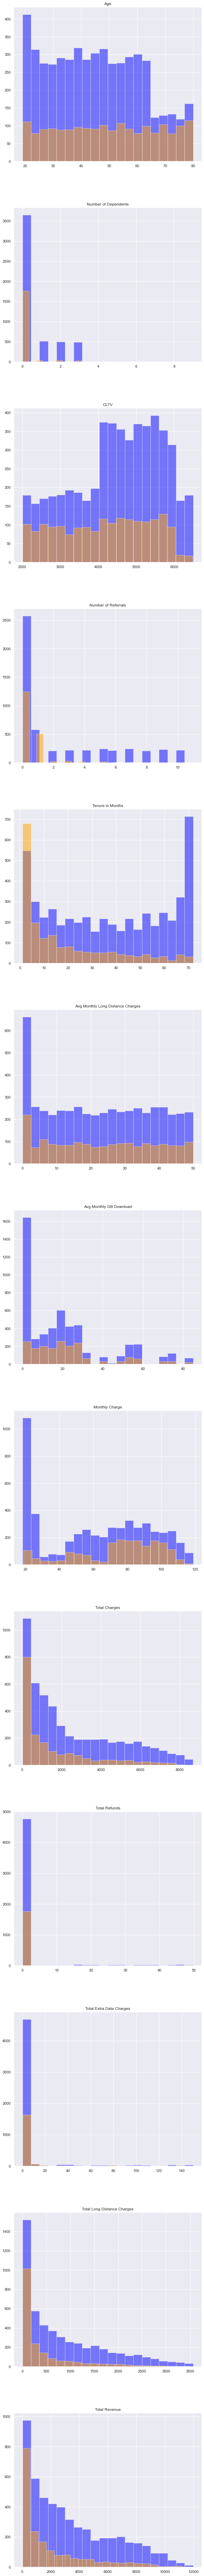

In [33]:
#Step 8.2. Plot Histogram of Continuous features (Numeric Columns)--------------------------------------
fig, ax = plt.subplots(13, 1, figsize=(10, 140))
df_telco[df_telco.Churn == 'No'][continuous_features].hist(bins=20, color="blue", alpha=0.5, ax=ax)
df_telco[df_telco.Churn == 'Yes'][continuous_features].hist(bins=20, color="orange", alpha=0.5, ax=ax)

In [34]:
from sklearn import preprocessing, svm
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures , LabelEncoder, StandardScaler
import sklearn.feature_selection
from sklearn.model_selection import train_test_split
from collections import defaultdict
from sklearn import metrics

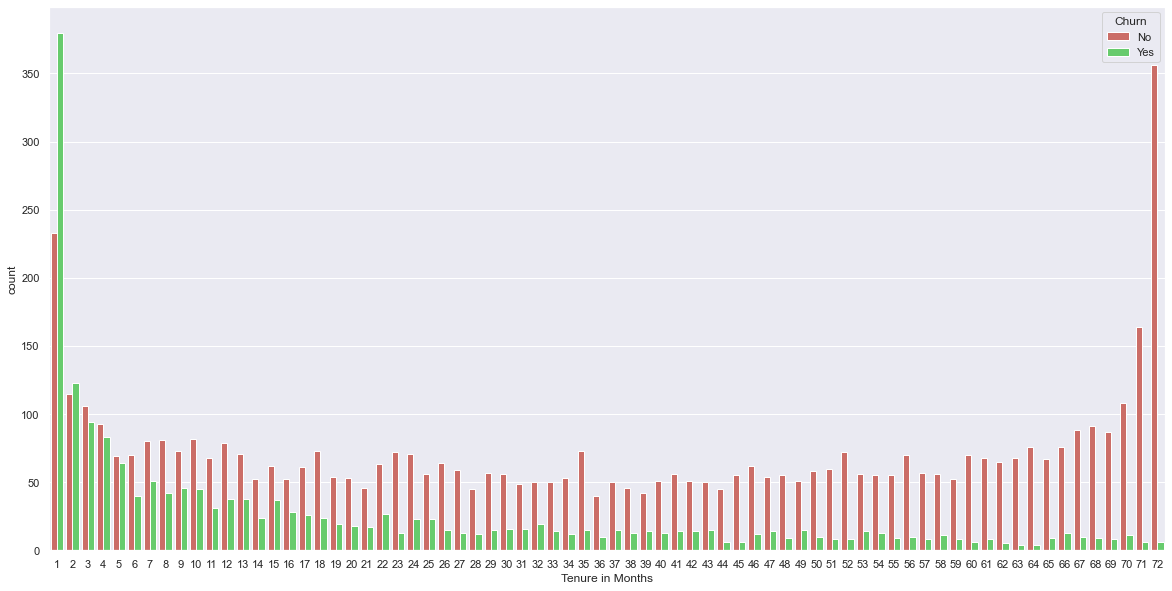

In [35]:
# Plot Tenure Frequency count
sn.set(style="darkgrid")
sn.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,10))
ax = sn.countplot(x="Tenure in Months", hue="Churn", data=df)

In [36]:
tenure  = df.columns.get_loc("Tenure in Months")
print(tenure)

7


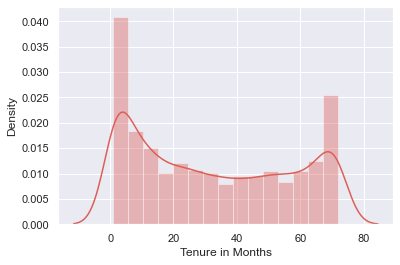

In [37]:
# Tenure in Months data distribution
histogram = sn.distplot(df.iloc[:, tenure], hist=True)
plt.show()

In [38]:
monthly = df.columns.get_loc("Monthly Charge")
print(monthly)

26


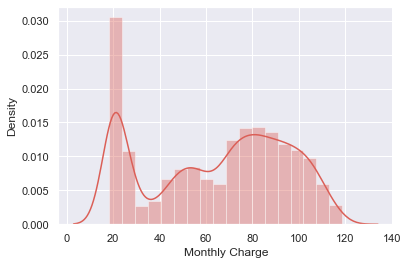

In [39]:
# Monthly Charges data distribution
histogram = sn.distplot(df.iloc[:, monthly], hist=True)
plt.show()

In [40]:
ttlchrg  = df.columns.get_loc("Total Charges")
print(ttlchrg)

27


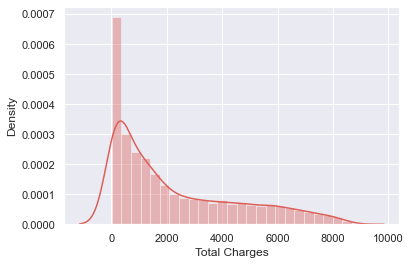

In [41]:
# Total Charges data distribution
#histogram = sn.distplot(x=df['Total Charges'], hist=True)
#plt.show()
histogram = sn.distplot(df.iloc[:, ttlchrg], hist=True)
plt.show()

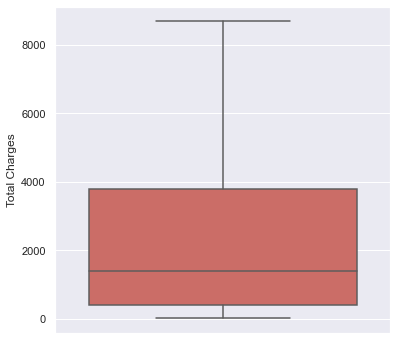

In [42]:
sn.set(style="darkgrid")
sn.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(6,6))
ax = sn.boxplot(y="Total Charges", hue="Churn", data=df, fliersize=14)

In [43]:
#Step 8.4. Find positive and negative continuous features correlations with the Response Variable--------------------
df_telco.corr(method='pearson')

,Age,Number of Dependents,CLTV,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
Age,1.000000,-0.119000,-0.001826,-0.025141,0.009927,-0.011749,-0.376595,0.144685,0.059684,0.024168,0.025036,0.003065,0.048265
Number of Dependents,-0.119000,1.000000,0.049611,0.278003,0.108237,-0.007324,0.129966,-0.131837,0.022535,0.014023,-0.014436,0.068966,0.038038
CLTV,-0.001826,0.049611,1.000000,0.122843,0.396292,0.023858,0.023043,0.098693,0.341947,0.007992,0.042540,0.282189,0.354198
Number of Referrals,-0.025141,0.278003,0.122843,1.000000,0.326975,0.006336,0.038575,0.028173,0.250378,0.024756,0.000350,0.216190,0.261853
Tenure in Months,0.009927,0.108237,0.396292,0.326975,1.000000,0.014596,0.049119,0.247582,0.826074,0.059021,0.082266,0.674149,0.853146
Avg Monthly Long Distance Charges,-0.011749,-0.007324,0.023858,0.006336,0.014596,1.000000,-0.030455,0.138396,0.069500,-0.018644,0.002414,0.599828,0.232291
Avg Monthly GB Download,-0.376595,0.129966,0.023043,0.038575,0.049119,-0.030455,1.000000,0.391787,0.223268,0.002397,0.088939,0.011373,0.180726
Monthly Charge,0.144685,-0.131837,0.098693,0.028173,0.247582,0.138396,0.391787,1.000000,0.651236,0.033482,0.126244,0.246300,0.588887
Total Charges,0.059684,0.022535,0.341947,0.250378,0.826074,0.069500,0.223268,0.651236,1.000000,0.039558,0.121859,0.610185,0.972212
Total Refunds,0.024168,0.014023,0.007992,0.024756,0.059021,-0.018644,0.002397,0.033482,0.039558,1.000000,0.016755,0.028113,0.036984


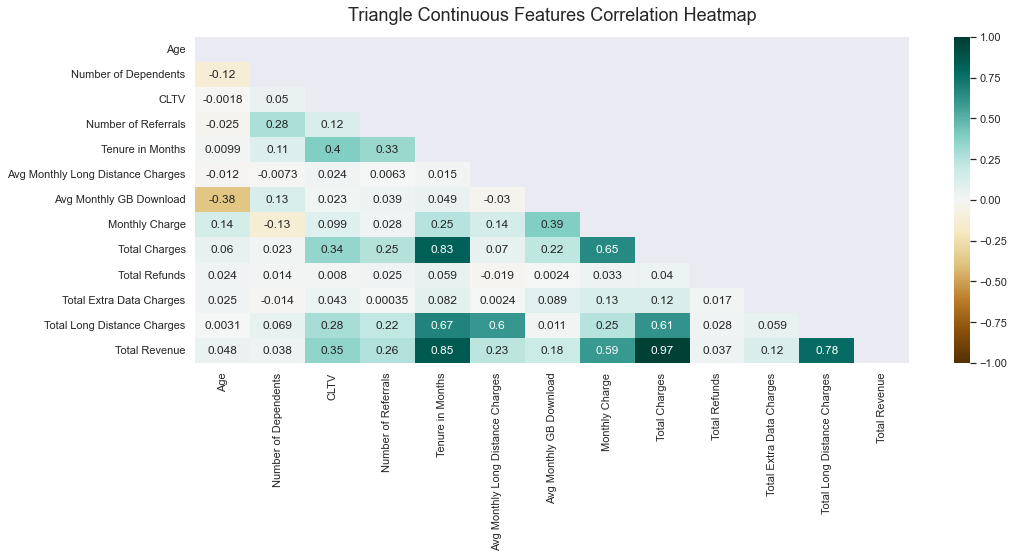

In [50]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sn.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Continuous Features Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

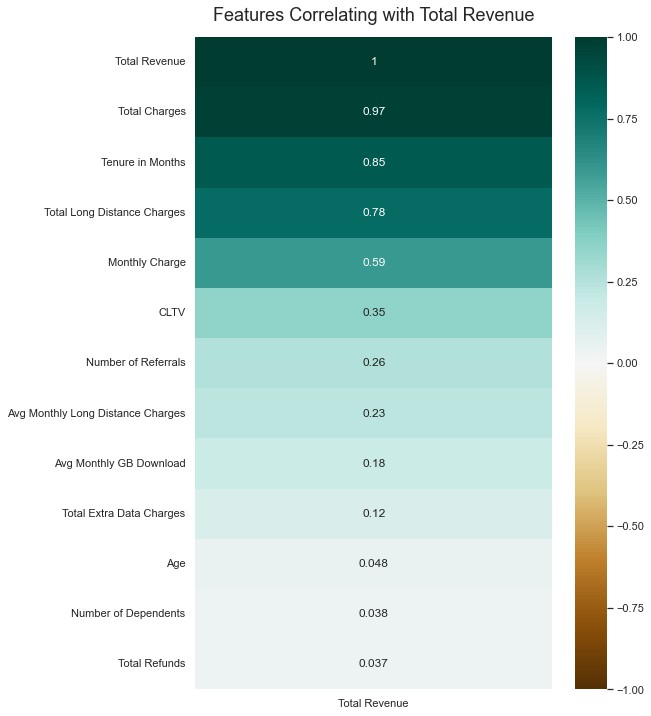

In [45]:
plt.figure(figsize=(8, 12))
heatmap = sn.heatmap(df_telco.corr()[['Total Revenue']].sort_values(by='Total Revenue', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Total Revenue', fontdict={'fontsize':18}, pad=16);

In [46]:
#Step 8.5. label Encode Binary data----------------------------------------------------------------

#Create a label encoder object
le = LabelEncoder()

# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in dt.columns[1:]:
    if dt[col].dtype == 'object':
        if len(list(dt[col].unique())) <= 2:
            le.fit(dt[col])
            dt[col] = le.transform(dt[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

14 columns were label encoded.


In [47]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  7043 non-null   object
 1   Married                 7043 non-null   int32 
 2   Churn                   7043 non-null   int32 
 3   Offer                   7043 non-null   object
 4   Phone Service           7043 non-null   int32 
 5   Multiple Lines          7043 non-null   int32 
 6   Internet Service        7043 non-null   int32 
 7   Internet Type           7043 non-null   object
 8   Online Security         7043 non-null   int32 
 9   Online Backup           7043 non-null   int32 
 10  Device Protection Plan  7043 non-null   int32 
 11  Premium Tech Support    7043 non-null   int32 
 12  Streaming TV            7043 non-null   int32 
 13  Streaming Movies        7043 non-null   int32 
 14  Streaming Music         7043 non-null   int32 
 15  Unli

In [48]:
#Step 8.6. Find positive and negative categorical correlations with the Response Variable (Churn)--------------------
dta = dt[['Gender', 'Married', 'Churn', 'Offer', 'Phone Service', 'Multiple Lines',
         'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 
         'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
         'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method']]
correlations = dta.corrwith(dt.Churn)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations = correlations[correlations<0].sort_values(ascending = False)

print('Most Positive Correlations: \n', positive_correlations)
print('\nMost Negative Correlations: \n', negative_correlations)

Most Positive Correlations: 
 Churn                1.000000
Internet Service     0.227890
Paperless Billing    0.191825
Unlimited Data       0.166545
Streaming TV         0.063228
Streaming Movies     0.061382
Streaming Music      0.045587
Multiple Lines       0.040102
Phone Service        0.011942
dtype: float64

Most Negative Correlations: 
 Device Protection Plan   -0.066160
Online Backup            -0.082255
Married                  -0.150448
Premium Tech Support     -0.164674
Online Security          -0.171226
dtype: float64


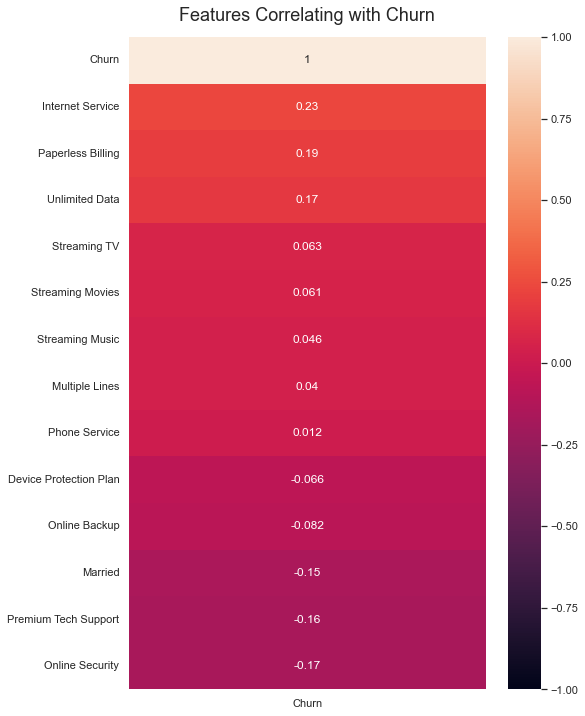

In [51]:
plt.figure(figsize=(8, 12))
heatmap = sn.heatmap(dt.corr()[['Churn']].sort_values(by='Churn', ascending=False), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Features Correlating with Churn', fontdict={'fontsize':18}, pad=16);

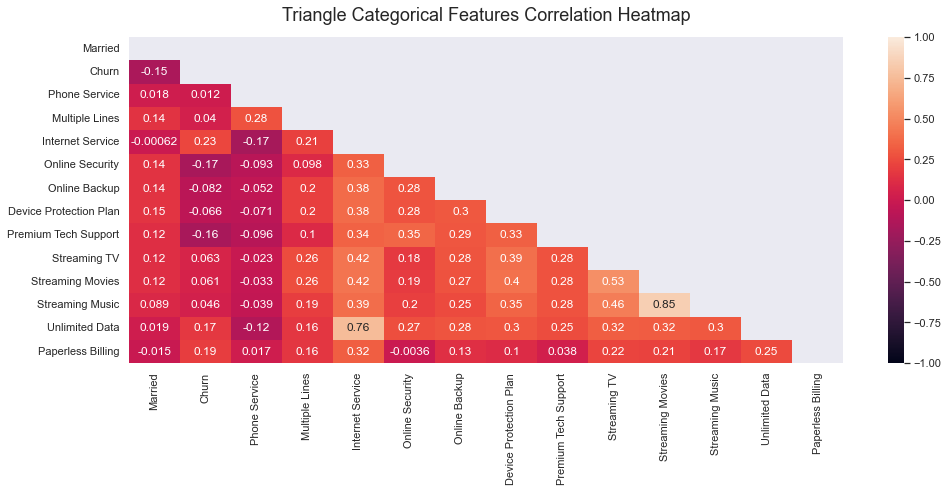

In [54]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(dt.corr(), dtype=np.bool))
heatmap = sn.heatmap(dt.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Triangle Categorical Features Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [55]:
#Step 8.6. Find Mutual Information with the Response Variable (Churn)--------------------
X = df_telco.copy()
y = X.pop("Churn")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [56]:
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

Contract                   0.120163
Internet Type              0.055778
Avg Monthly GB Download    0.042794
Offer                      0.035314
Payment Method             0.028468
Online Security            0.016119
Married                    0.011357
Streaming Movies           0.004041
Streaming Music            0.000000
Phone Service              0.000000
Online Backup              0.000000
Name: MI Scores, dtype: float64

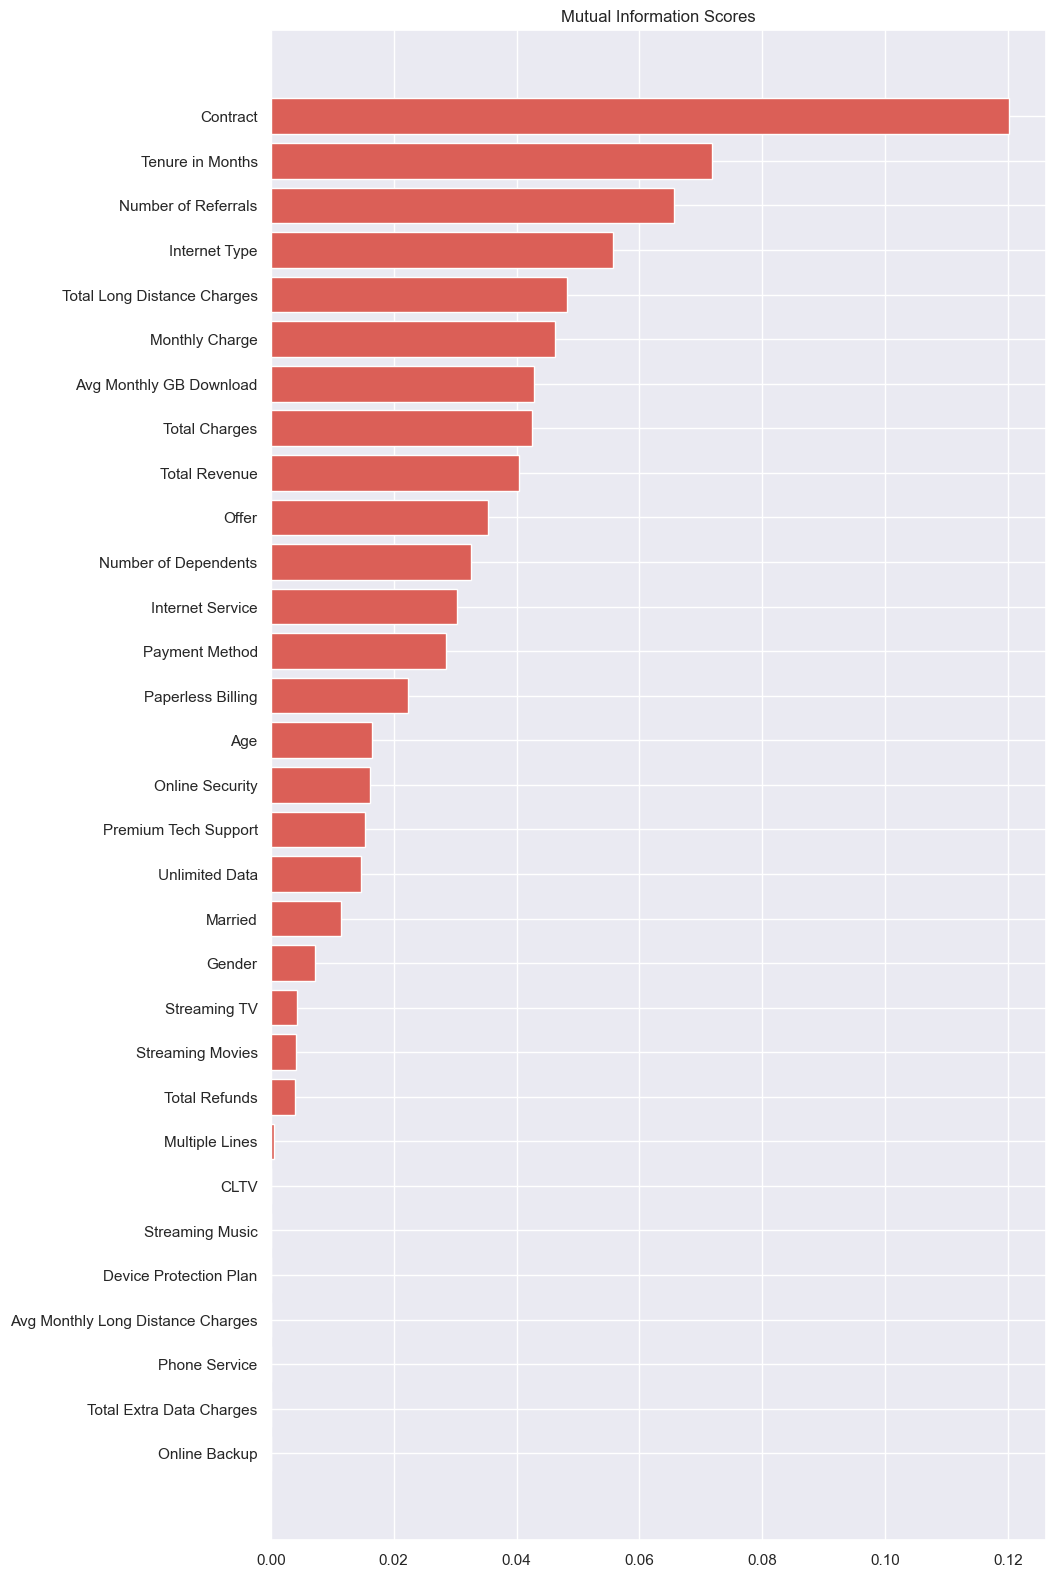

In [57]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(10, 20))
plot_mi_scores(mi_scores)

In [58]:
df_telco_transformed = df_telco.copy()

# label encoding (binary variables)
label_encoding_columns = ['Gender', 'Married', 'Churn','Phone Service', 'Multiple Lines', 'Internet Service', 
                          'Online Security','Online Backup', 'Device Protection Plan', 'Premium Tech Support',
                          'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Paperless Billing']

# encode categorical binary features using label encoding
for column in label_encoding_columns:
    if column == 'Gender':
        df_telco_transformed[column] = df_telco_transformed[column].map({'Female': 1, 'Male': 0})
    else: 
        df_telco_transformed[column] = df_telco_transformed[column].map({'Yes': 1, 'No': 0}) 

In [59]:

# one-hot encoding (categorical variables with more than two levels)
one_hot_encoding_columns = ['Offer', 'Internet Type', 'Contract','Payment Method']

# encode categorical variables with more than two levels using one-hot encoding
df_telco_transformed = pd.get_dummies(df_telco_transformed, columns = one_hot_encoding_columns)

In [60]:
# min-max normalization (numeric variables)
min_max_columns = ['Age', 'Number of Dependents', 'CLTV',  'Number of Referrals',  'Tenure in Months',
                   'Avg Monthly Long Distance Charges',  'Avg Monthly GB Download', 'Monthly Charge',
                   'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges',
                   'Total Revenue']

# scale numerical variables using min max scaler
for column in min_max_columns:
        # minimum value of the column
        min_column = df_telco_transformed[column].min()
        # maximum value of the column
        max_column = df_telco_transformed[column].max()
        # min max scaler
        df_telco_transformed[column] = (df_telco_transformed[column] - min_column) / (max_column - min_column)   

In [61]:
# select independent variables
X = df_telco_transformed.drop(columns='Churn')

# select dependent variables
y = df_telco_transformed.loc[:, 'Churn']

# prove that the variables were selected correctly
print(X.columns)

# prove that the variables were selected correctly
print(y.name)

Index(['Gender', 'Age', 'Married', 'Number of Dependents', 'CLTV',
       'Number of Referrals', 'Tenure in Months', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Avg Monthly GB Download', 'Online Security',
       'Online Backup', 'Device Protection Plan', 'Premium Tech Support',
       'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data',
       'Paperless Billing', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Offer_None', 'Offer_Offer A', 'Offer_Offer B',
       'Offer_Offer C', 'Offer_Offer D', 'Offer_Offer E',
       'Internet Type_Cable', 'Internet Type_DSL', 'Internet Type_Fiber Optic',
       'Internet Type_None', 'Contract_Month-to-Month', 'Contract_One Year',
       'Contract_Two Year', 'Payment Method_Bank Withdrawal',
       'Payment Method_Credit Card', 'Payment Method_Mailed Check'],
      dtype='